In [1]:
## preps
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#specify your path
sys_path = "/Users/sigao/Yelp/yelp_dataset"

In [2]:
## load toronto restaurants
df_res_bus = pd.read_csv("business_data_subset.csv", index_col= None)
df_res_bus_ids = df_res_bus.business_id.unique()
df_res_bus.head()


,business_id,business_name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3.0,5,0,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Food, Restaurants, Grocery, Middle Eastern",NaN
1,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Food, Pretzels, Bakeries, Fast Food, Restaurants","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
2,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.099738,-115.301568,2.5,15,0,"{'Alcohol': ""u'none'"", 'WiFi': ""u'no'"", 'GoodF...","Mexican, Restaurants, Fast Food",NaN
3,rVBPQdeayMYht4Uv_FOLHg,Gourmet Burger Company,843 Kipling Avenue,Toronto,ON,M8Z 5G9,43.633291,-79.531768,3.0,13,0,"{'RestaurantsPriceRange2': '2', 'RestaurantsAt...","Restaurants, Burgers, Food",NaN
4,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,6530 S Decatur Blvd,Las Vegas,NV,89118,36.071196,-115.207463,3.0,10,0,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Burgers, Restaurants, American (Traditional), ...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [5]:
df_res_bus.business_id.unique()

array(['CsLQLiRoafpJPJSkNX2h5Q', 'vjTVxnsQEZ34XjYNS-XUpA',
       'fnZrZlqW1Z8iWgTVDfv_MA', ..., 'YZeUH6zYS0dq5QHLYZhUnQ',
       'hskVqZCPqy-omm9CHi44xQ', 'SYa2j1boLF8DcGVOYfHPcA'], dtype=object)

(24401, 14)
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'number of restaurants')

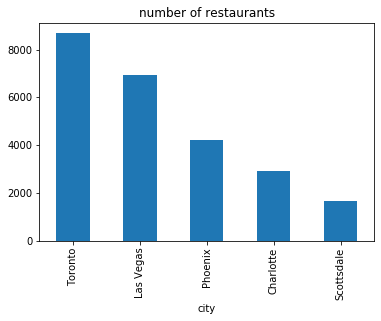

In [6]:
print(df_res_bus.shape)
print(df_res_bus.groupby(["city"])["business_id"].size().sort_values(ascending = False).plot.bar())
plt.title("number of restaurants")

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'median reviews per restaurant')

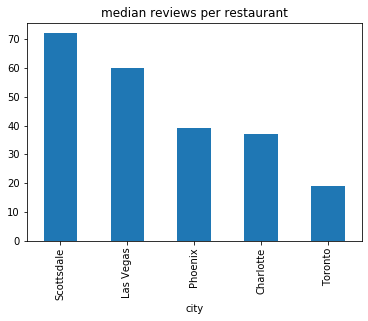

In [7]:
print(df_res_bus.groupby(["city"])["review_count"].median().sort_values(ascending = False).plot.bar())
plt.title("median reviews per restaurant")


********************************************************************************
Total Reviews:
AxesSubplot(0.125,0.125;0.775x0.755)
********************************************************************************
Reviews per restaurant:


,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Scottsdale,1652.0,159.851090,244.384220,3.0,21.00,72.0,186.25,2369.0
Las Vegas,6931.0,209.943010,470.989328,3.0,18.00,60.0,200.00,10129.0
Phoenix,4217.0,116.741285,220.157249,3.0,13.00,39.0,129.00,3515.0
Charlotte,2922.0,86.027721,142.129921,3.0,12.25,37.0,100.00,2028.0
Toronto,8679.0,48.450167,90.514142,3.0,7.00,19.0,52.00,2758.0


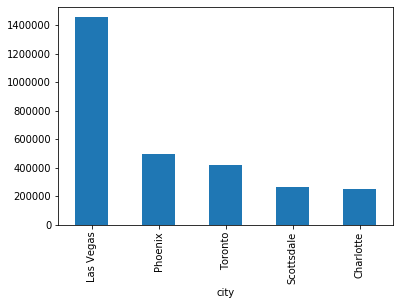

In [8]:
print("*"*80)
print("Total Reviews:")
print(df_res_bus.groupby(["city"])["review_count"].agg(sum).sort_values(ascending = False).plot.bar())
print("*"*80)
print("Reviews per restaurant:")
df_res_bus.groupby(["city"])["review_count"].describe().sort_values("50%", ascending = False) 

In [9]:
## Review data for restaurants
## This will take a long time

review_data_samp = []
count = 0
count_cap = 1e9

with open("{0}/yelp_academic_dataset_review.json".format(sys_path)) as f:
    for line in f:
        if json.loads(line)["business_id"] in df_res_bus_ids:
            review_data_samp.append(json.loads(line))
        count+= 1
        if count > count_cap:
            break     
review_df_samp = pd.DataFrame.from_dict(review_data_samp)
review_df_samp.to_csv("reviews_data_subset.csv", index=None)


In [10]:
review_df_samp.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
1,JA-xnyHytKiOIHl_ztnK9Q,P6apihD4ASf1vpPxHODxAQ,e_BiI4ej1CW1F0EyVLr-FQ,5.0,0,0,0,Most delicious authentic Italian I've had in t...,2015-02-16 06:48:47
2,bVTjZgRNq8ToxzvtiVrqMA,2hRe26HSCAWbFRn5WChK-Q,d4qwVw4PcN-_2mK2o1Ro1g,1.0,0,0,0,10pm on a super bowl Sunday and they're alread...,2015-02-02 06:28:00
3,UGErdm6bt48SXTVwJIti2Q,QodunSzok4nIYFNrTSGesQ,poSV39UqEg-gpESXafS9-g,3.0,0,0,0,My husband and I go there once a week since la...,2018-03-04 01:03:53
4,TeX0eOIeZb_wpo86rCedXQ,RR-2nouBn408e3djxC470g,d4qwVw4PcN-_2mK2o1Ro1g,5.0,0,0,0,Holy heck this place is amazing. I love their ...,2017-02-09 04:25:03


In [9]:
reviews_df = pd.read_csv("reviews_data_subset.csv")
reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0.0,0.0,0.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
1,JA-xnyHytKiOIHl_ztnK9Q,P6apihD4ASf1vpPxHODxAQ,e_BiI4ej1CW1F0EyVLr-FQ,5.0,0.0,0.0,0.0,Most delicious authentic Italian I've had in t...,2015-02-16 06:48:47
2,bVTjZgRNq8ToxzvtiVrqMA,2hRe26HSCAWbFRn5WChK-Q,d4qwVw4PcN-_2mK2o1Ro1g,1.0,0.0,0.0,0.0,10pm on a super bowl Sunday and they're alread...,2015-02-02 06:28:00
3,UGErdm6bt48SXTVwJIti2Q,QodunSzok4nIYFNrTSGesQ,poSV39UqEg-gpESXafS9-g,3.0,0.0,0.0,0.0,My husband and I go there once a week since la...,2018-03-04 01:03:53
4,TeX0eOIeZb_wpo86rCedXQ,RR-2nouBn408e3djxC470g,d4qwVw4PcN-_2mK2o1Ro1g,5.0,0.0,0.0,0.0,Holy heck this place is amazing. I love their ...,2017-02-09 04:25:03


In [10]:
# User data
reviews_df.shape

(2982269, 9)

In [11]:
## merge the two 
df_merge = pd.merge(reviews_df, df_res_bus[['city','categories', 'business_id',"review_count"]], how = "outer", on ="business_id")
df_merge.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,city,categories,review_count
0,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0.0,0.0,0.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52,Las Vegas,"Restaurants, Mexican",56.0
1,Q9pkOKlRbHZy1pTUkTcBnQ,m-BZLIIh5PCAKnzH0qj_0Q,5JxlZaqCnk1MnbgRirs40Q,3.0,2.0,1.0,1.0,The three stars here don't represent a real re...,2012-06-26 07:51:00,Las Vegas,"Restaurants, Mexican",56.0
2,Y6hcNJ2bek3hSG4wm4UHKQ,PKEzKWv_FktMm2mGPjwd0Q,5JxlZaqCnk1MnbgRirs40Q,4.0,4.0,1.0,1.0,"I've been here several times, but I never revi...",2011-02-15 02:35:38,Las Vegas,"Restaurants, Mexican",56.0
3,E7Qtf8zR-e2wXFpVuaNDWQ,GdnJtqYWVSBAjya-WdN5RQ,5JxlZaqCnk1MnbgRirs40Q,2.0,2.0,0.0,0.0,I took my folks here last weekend for dinner o...,2012-05-30 18:54:30,Las Vegas,"Restaurants, Mexican",56.0
4,Q3kju7l36U0KWfuZRL_wlw,bX_VFU48rabrU_yHNL2XZg,5JxlZaqCnk1MnbgRirs40Q,4.0,0.0,0.0,0.0,"Above average in taste & presentation, which i...",2012-11-07 00:05:33,Las Vegas,"Restaurants, Mexican",56.0


In [12]:
df_merge.dropna(inplace=True)

In [13]:
df_merge.city.unique()

array(['Las Vegas', 'Scottsdale', 'Phoenix', 'Toronto', 'Charlotte'],
      dtype=object)

###  Most users give only 1 rating...

In [14]:
x = df_merge.groupby(["city","user_id"]).size().reset_index()
print("users' reviews summary statistics")
x.groupby("city").describe()

users' reviews summary statistics


0                                                 
               count      mean        std  min  25%  50%  75%     max
city                                                                 
Charlotte    86527.0  3.008980   9.245163  1.0  1.0  1.0  2.0   510.0
Las Vegas   536321.0  2.803996   8.081294  1.0  1.0  1.0  2.0  1502.0
Phoenix     190688.0  2.679676   6.866005  1.0  1.0  1.0  2.0   590.0
Scottsdale  117308.0  2.340889   5.873821  1.0  1.0  1.0  2.0   684.0
Toronto     102616.0  4.214538  13.077260  1.0  1.0  1.0  3.0  1130.0

Text(0.5, 1.0, 'Average reviews per User')

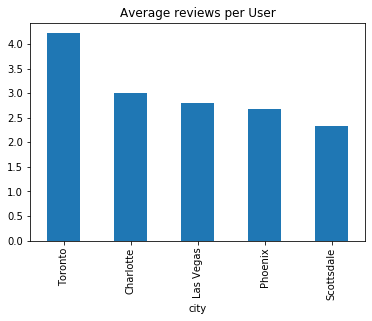

In [16]:
x.groupby("city").describe()[(0, "mean")].sort_values(ascending = False).plot.bar()
plt.title("Average reviews per User")

In [112]:
## Now redo the above process but now screen out restaurants with less than 20 reviews

In [17]:
df_res_bus_clean = df_res_bus[df_res_bus["review_count"]>= 20 ]

********************************************************************************
Total Reviews:
AxesSubplot(0.125,0.125;0.775x0.755)
********************************************************************************
Reviews per restaurant:


,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Scottsdale,1264.0,205.935127,262.705017,20.0,54.0,113.0,248.0,2369.0
Las Vegas,5117.0,281.154583,530.186701,20.0,49.0,111.0,296.0,10129.0
Phoenix,2789.0,171.827895,253.610997,20.0,40.0,87.0,197.0,3515.0
Charlotte,1902.0,127.252892,161.726842,20.0,39.0,73.0,151.0,2028.0
Toronto,4291.0,89.187602,115.178398,20.0,31.0,53.0,99.0,2758.0


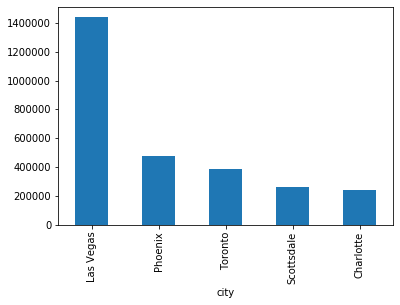

In [18]:
print("*"*80)
print("Total Reviews:")
print(df_res_bus_clean.groupby(["city"])["review_count"].agg(sum).sort_values(ascending = False).plot.bar())
print("*"*80)
print("Reviews per restaurant:")
df_res_bus_clean.groupby(["city"])["review_count"].describe().sort_values("50%", ascending = False) 